In [36]:
import os, sys
import iris
import numpy
import iris.plot as iplt
import matplotlib.pyplot as plt
import seaborn
seaborn.set_context('talk')

cwd = os.getcwd()
repo_dir = '/'
for directory in cwd.split('/')[1:]:
    repo_dir = os.path.join(repo_dir, directory)
    if directory == 'ocean-analysis':
        break

modules_dir = os.path.join(repo_dir, 'modules')
sys.path.append(modules_dir)

import general_io as gio
import timeseries
import convenient_universal as uconv


In [47]:
hfds_file = '/g/data/r87/dbi599/DRSv2/CMIP5/CSIRO-Mk3-6-0/historical/yr/ocean/r1i1p1/hfds/latest/dedrifted/hfds-zonal-sum_Oyr_CSIRO-Mk3-6-0_historical_r1i1p1_cumsum-all.nc'
ohc_file = '/g/data/r87/dbi599/DRSv2/CMIP5/CSIRO-Mk3-6-0/historical/yr/ocean/r1i1p1/ohc/latest/dedrifted/ohc-zonal-sum_Oyr_CSIRO-Mk3-6-0_historical_r1i1p1_all.nc'
hfbasin_file = '/g/data/r87/dbi599/DRSv2/CMIP5/CSIRO-Mk3-6-0/historical/yr/ocean/r1i1p1/hfbasin/latest/dedrifted/hfbasin-global_Oyr_CSIRO-Mk3-6-0_historical_r1i1p1_cumsum-all.nc'

In [6]:
time_constraint = gio.get_time_constraint(['1861-01-01', '2005-12-31'])

In [45]:
ohc_cube = iris.load_cube(ohc_file, 'ocean heat content' & time_constraint)
ohc_cube

<iris 'Cube' of ocean heat content / (J) (time: 145; latitude: 189)>

In [57]:
hfds_cube = iris.load_cube(hfds_file, 'surface_downward_heat_flux_in_sea_water' & time_constraint)
hfds_cube

<iris 'Cube' of surface_downward_heat_flux_in_sea_water / (J) (time: 145; latitude: 189)>

In [48]:
hfbasin_cube = iris.load_cube(hfbasin_file, 'northward_ocean_heat_transport' & time_constraint)
hfbasin_cube

<iris 'Cube' of northward_ocean_heat_transport / (J) (time: 145; latitude: 189)>

In [14]:
def calc_anomaly(cube):
    """Calculate the anomaly."""
    
    anomaly = cube.copy()
    anomaly.data = anomaly.data - anomaly.data[0]
    
    return anomaly

In [49]:
ohc_anomaly = calc_anomaly(ohc_cube)
hfds_anomaly = calc_anomaly(hfds_cube)
hfbasin_anomaly = calc_anomaly(hfbasin_cube)

In [30]:
hfds_anomaly[-1, ::]

<iris 'Cube' of surface_downward_heat_flux_in_sea_water / (J) (latitude: 189)>

In [58]:
convergence = ohc_anomaly[-1, ::] - hfds_anomaly[-1, ::]
convergence

<iris 'Cube' of unknown / (J) (latitude: 189)>

In [55]:
hfbasin = convergence.copy()
hfbasin.data = numpy.ma.cumsum(-1 * convergence.data)

In [19]:
%matplotlib inline

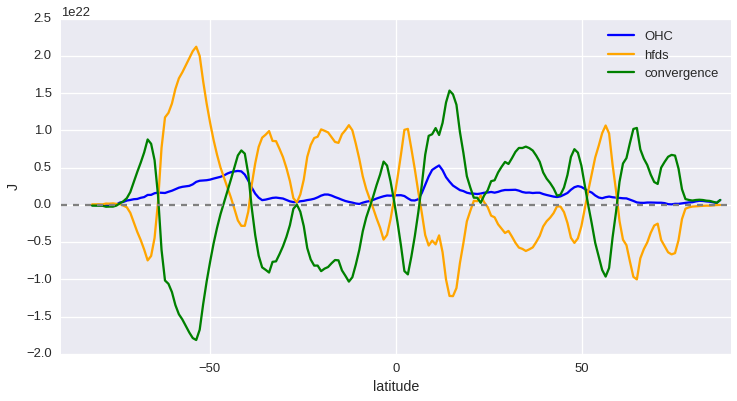

In [53]:
fig, ax = plt.subplots(figsize=[12, 6])

iplt.plot(ohc_anomaly[-1, ::], color='blue', label='OHC')
iplt.plot(hfds_anomaly[-1, ::], color='orange', label='hfds')
iplt.plot(convergence, color='green', label='convergence')

plt.xlabel('latitude')
plt.ylabel('J')
plt.xlim(-90, 90)

plt.axhline(y=0, color='0.5', linestyle='--')

plt.legend()
plt.show()

In [28]:
ohc_anomaly[-1, ::].data.sum()

2.6108229638745892e+23

In [29]:
hfds_anomaly[-1, ::].data.sum()

2.5853625604736401e+23

These totals match the [corresponding global timeseries](https://www.flickr.com/photos/69921266@N08/40373452040/). 

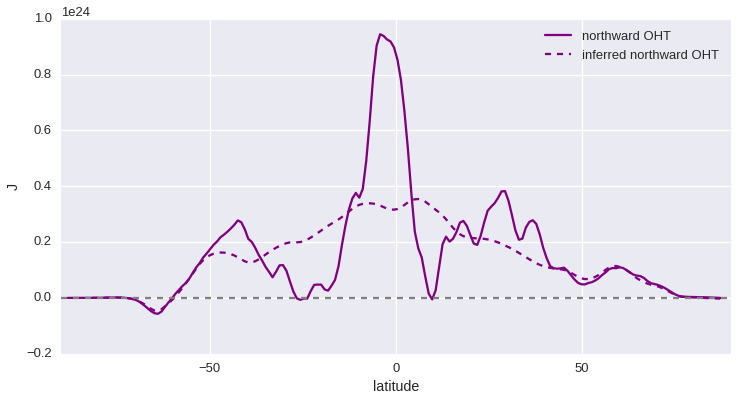

In [56]:
fig, ax = plt.subplots(figsize=[12, 6])

iplt.plot(hfbasin_anomaly[-1, ::], color='purple', label='northward OHT')
iplt.plot(hfbasin, color='purple', linestyle='--', label='inferred northward OHT')

plt.xlabel('latitude')
plt.ylabel('J')
plt.xlim(-90, 90)

plt.axhline(y=0, color='0.5', linestyle='--')

plt.legend()
plt.show()